TASK:

Create NN with Keras to classify goods from dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Proposed NN initial architecture: - 
- # layers (in, den1, den2, out)
- activation func (Hidden: ReLU, Leaky ReLU, Parametric ReLU, ELU; Output: Softmax)
- # epoch (50 - 600)
- # neurons in layer (784, 128, 256, 10)
- batch size (32, 72)
- optimizer (SGD,  Adam)
- initial learning rate (0.025)
- validation rate in training data (40%)
Requirement of accuracy: >=0.91

# MODEL Adam_b32_ep50_class

In [11]:
from tensorflow import keras

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [14]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 10 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя
n_hidden_3 = 256 # количество нейронов 3-го слоя
n_hidden_4 = 256 # количество нейронов 4-го слоя

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# One-hot encode target variable if it is a multiclass problem
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [17]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(784,)),
    Dense(n_hidden_2, activation='relu'),
    Dense(n_hidden_3, activation='relu'),
    Dense(n_hidden_4, activation='relu'),
    Dense(10, activation='softmax'),
])

In [18]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [20]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 0.5266 - accuracy: 0.8069 - val_loss: 0.4210 - val_accuracy: 0.8467
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3974 - accuracy: 0.8555 - val_loss: 0.3955 - val_accuracy: 0.8543
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3535 - accuracy: 0.8712 - val_loss: 0.3939 - val_accuracy: 0.8482
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3284 - accuracy: 0.8776 - val_loss: 0.3660 - val_accuracy: 0.8663
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3079 - accuracy: 0.8860 - val_loss: 0.3562 - val_accuracy: 0.8684
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2938 - accuracy: 0.8928 - val_loss: 0.3627 - val_accuracy: 0.8662
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2793 - accuracy: 0.8962 - val_loss: 0.3524 - val_accuracy:

In [23]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 26ms/step
Predicted class: 1


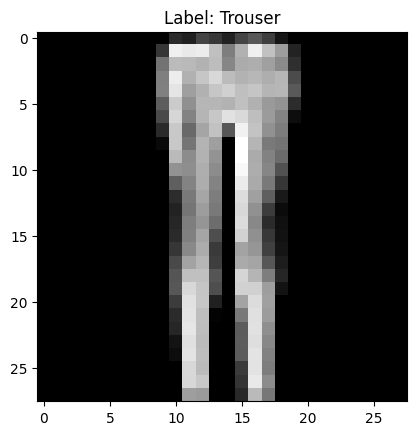

In [24]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

In [25]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.83      0.68      0.75      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.72      0.84      0.77      1000
      Sandal       0.95      0.96      0.96      1000
       Shirt       0.75      0.62      0.68      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [26]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8718
[0.3799861669540405, 0.8718000054359436]


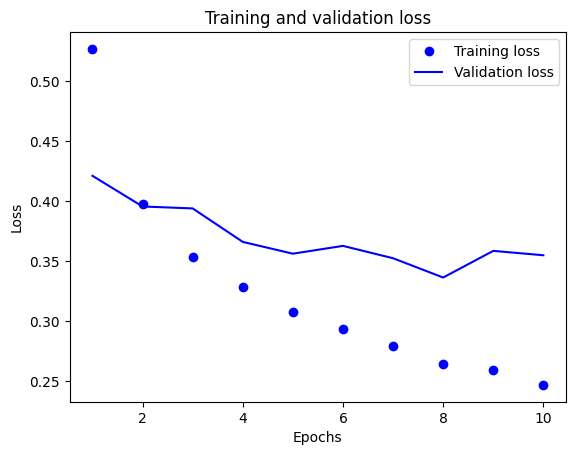

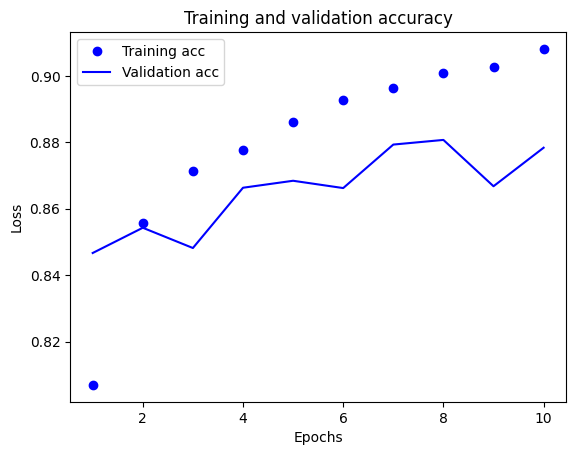

In [27]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adam_b32_ep50_class")